In [1]:
def get_angle(v1, v2):
    angle = np.dot(v1, v2) / (np.sqrt(np.sum(v1 * v1)) * np.sqrt(np.sum(v2 * v2)))  # cos
    angle = np.arccos(angle) / 3.14 * 180
    return angle


# calcul d'angle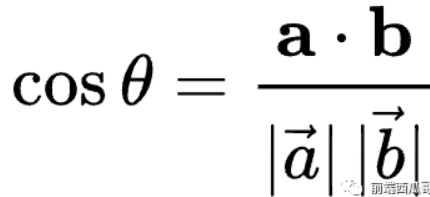

#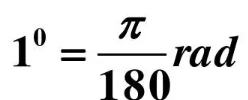

In [2]:
def get_str_gestion(up_figers, list_lms):
    str_gestion = "                "
    if len(up_figers) == 1:
        if up_figers[0] == 8 :
            v1 = list_lms[6] - list_lms[7]
            v2 = list_lms[8] - list_lms[7]
            angle = get_angle(v1, v2)

            if angle < 150:
                str_gestion = '9'

            else:
                str_gestion = '1'


        if up_figers[0] == 4:
            v1 = list_lms[4] - list_lms[3]
            v2 = list_lms[2] - list_lms[3]
            angle = get_angle(v1, v2)

            if angle > 150:
                str_gestion = 'GOOD'


        if up_figers[0] == 20:
            str_gestion = 'bad'


        if up_figers[0] == 12:
            str_gestion = 'Fxxx'



    if len(up_figers) == 2 :
        if up_figers[0] == 20 and up_figers[1] == 4:
            str_gestion = 'appel'


        if up_figers[0] == 20 and up_figers[1] == 8:
            str_gestion = '8'




    if len(up_figers) == 3 :
        if up_figers[0] == 8 and up_figers[1] == 12 and up_figers[2] == 16:
            str_gestion = '3'


        if up_figers[0] == 4 and up_figers[1] == 8 and up_figers[2] == 12:
            dis_8_12 = list_lms[8,:] - list_lms[12,:]
            dis_8_12 = np.sqrt(np.dot(dis_8_12,dis_8_12))

            dis_4_12 = list_lms[4,:] - list_lms[12,:]
            dis_4_12 = np.sqrt(np.dot(dis_4_12,dis_4_12))

            if dis_4_12/(dis_8_12 + 1) < 3:
                str_gestion = 'manger'

            elif dis_4_12/(dis_8_12 + 1) > 5:
                str_gestion = 'gun'

            else:
                str_gestion = 'manger'


        if up_figers[0] == 4 and up_figers[1] == 8 and up_figers[2] == 20:

            str_gestion = 'ROCK'



    elif len(up_figers) == 4 and up_figers[0] == 8 and up_figers[1] == 12 and up_figers[2] == 16 and up_figers[3] ==20:

        str_gestion = '4'


    elif len(up_figers) == 5:

        str_gestion = '5'


    elif len(up_figers) == 0:

        str_gestion = ' 0 '

    # print(str_gestion)
    return str_gestion

# Dans la première étape, les points 4, 8 et 12 sont soustraits pour obtenir les vecteurs V1 et v2. Calculez ensuite l'angle.

# Donnez ensuite des contraintes (ces contraintes nécessitent un réglage et des tests constants)

# up_figner fait référence au nombre de points à l'extérieur de l'enveloppe convexe（4，8，12，20）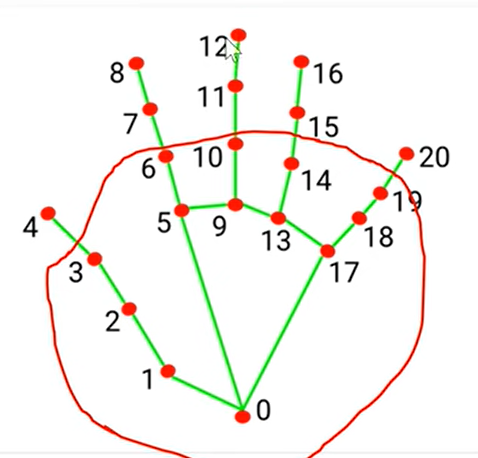

In [3]:
import mediapipe as mp
import cv2
import numpy as np

str_gestion = None

def main():


    cap = cv2.VideoCapture(0)
    mpHands = mp.solutions.hands
    hands = mpHands.Hands()
    mpDraw = mp.solutions.drawing_utils
    width = 1280
    height = 720
    cap.set(3, width)
    cap.set(4, height)

    while True:

        up_fingers = []
        success, img = cap.read()
        if not success:
            continue
        image_height, image_width, _ = np.shape(img)
        img = cv2.flip(img, 1)
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(imgRGB)

        if results.multi_hand_landmarks:

            hand = results.multi_hand_landmarks[0]
            mpDraw.draw_landmarks(img, hand, mpHands.HAND_CONNECTIONS)
            list_lms = []
            for i in range(21):
                Xpos = hand.landmark[i].x * image_width
                Ypos = hand.landmark[i].y * image_height
                list_lms.append([int(Xpos), int(Ypos)])


            list_lms = np.array(list_lms, dtype=np.int32)
            hull_index = [0, 1, 2, 3, 6, 10, 14, 19, 18, 17, 10]

            hull = cv2.convexHull(list_lms[hull_index, :])  # définir l'enveloppe convexe
            cv2.polylines(img, [hull], True, (0, 255, 0), 2)


            ft = [4, 8, 12, 16, 20]  # fingertip
            # bout des doigts à l'extérieur

            for i in ft:
                ft_pos = (int(list_lms[i][0]), int(list_lms[i][1]))
                dist = cv2.pointPolygonTest(hull, ft_pos, True)  # vérifiez que ces points sont à l'extérieur
                if dist < 0:
                    up_fingers.append(i)

                    for i in ft:
                        Xpos = hand.landmark[i].x * image_width
                        Ypos = hand.landmark[i].y * image_height
                        cv2.circle(img, (int(Xpos), int(Ypos)), 3, (0, 255, 255), -1)

        if len(up_fingers) > 0:
            str_guestion = get_str_gestion(up_fingers, list_lms)
            cv2.putText(img, ' %s' % (str_guestion), (90, 90), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 4,
                        cv2.LINE_AA)


        cv2.imshow("hands", img)

        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break

# Définissez d'abord les paramètres.


# Il doit obtenir deux listes.


# L'un est tous les points de coque convexes (régions importantes) et l'autre est le point de la pointe.

# Si le bout du doigt est à l'extérieur de la coque convexe, il sera enregistré comme up_figner【】
